## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [2]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


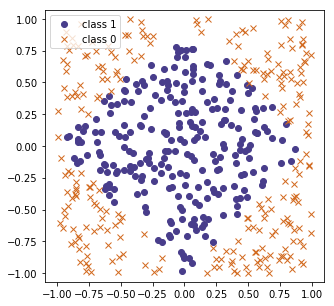

In [3]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue') # red 0
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')     # blue x 
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [4]:
x_mat_full[y==1, 0]

array([ 7.14239735e-02, -4.73793007e-01,  5.16507715e-02, -4.31709829e-01,
        3.03226505e-01,  7.78526575e-02, -1.05982109e-01, -1.33104465e-01,
       -4.69192073e-01,  1.77059835e-01,  3.08403023e-01,  8.69526603e-01,
       -1.82304054e-01,  3.22954850e-01, -5.59818320e-01, -6.90100497e-02,
        4.13341040e-02, -9.72317735e-02, -3.30576524e-01, -5.89382878e-01,
       -3.40125639e-01, -5.56566254e-01,  1.98609674e-01,  2.18742258e-01,
       -1.19047519e-01,  3.73847339e-01, -7.65034227e-01,  1.39777249e-01,
       -7.51756677e-02, -4.56670902e-01,  3.01243334e-01, -3.13398099e-02,
       -3.95255600e-01,  6.09207233e-01,  1.08141289e-01, -4.23821260e-01,
        3.67206188e-01,  2.69013220e-01, -1.60970800e-01,  2.33539306e-01,
        4.88422295e-01,  5.50853716e-01, -3.80385967e-01, -7.98736790e-01,
        1.58655366e-01,  2.53954938e-01, -1.74807188e-01, -4.24648184e-01,
       -3.04009765e-02, -2.80182661e-01,  8.39376015e-02, -5.26947980e-01,
        6.20278067e-01,  

In [5]:
y

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Here are some helper functions

In [15]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    #Log loss, also called logistic regression loss or cross-entropy loss, is defined on probability estimates. It is
    #commonly used in (multinomial) logistic regression and neural networks, as well as in some variants of expectation-maximization,
    #and can be used to evaluate the probability outputs (predict_proba) of a classifier instead of its discrete predictions.
        
    
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)                #  activation function
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred                            # derivative of quadratic lost function
    J_W_2_grad = np.dot(J_z_3_grad, a_2)                # derivative of linear activation (regression)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))        # derivative of linear transformation
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations total')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

In [16]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform(y)

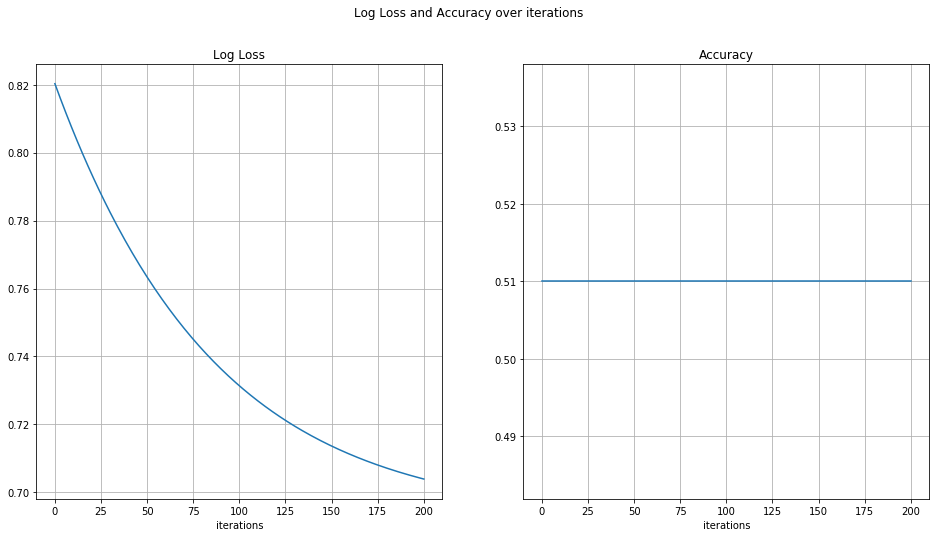

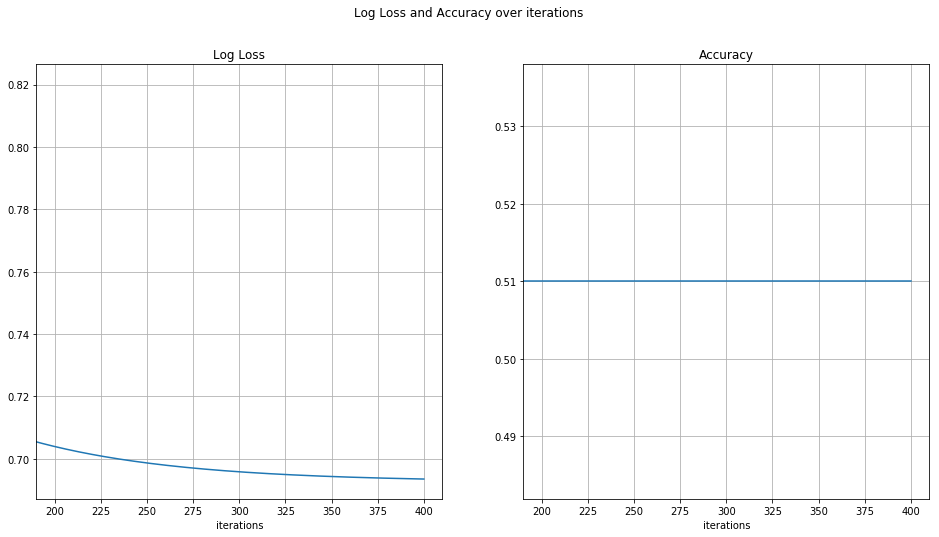

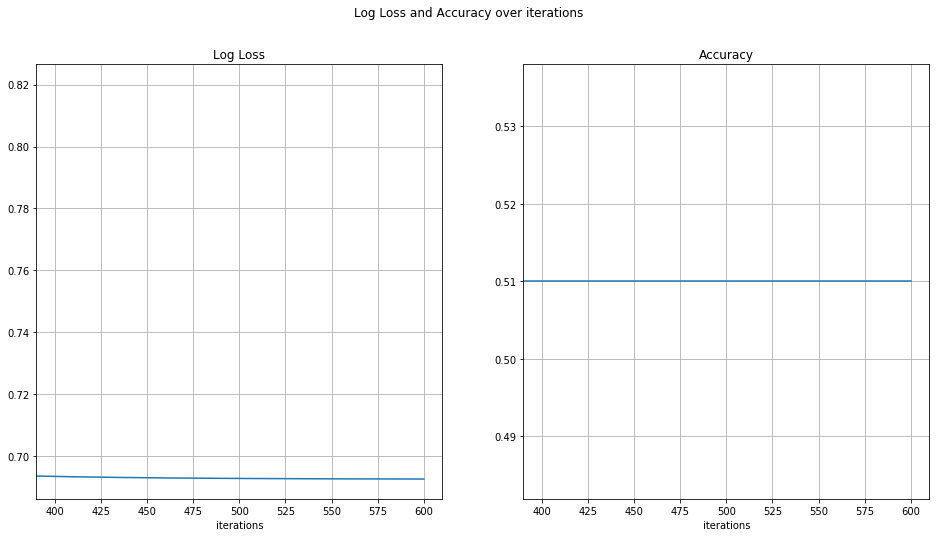

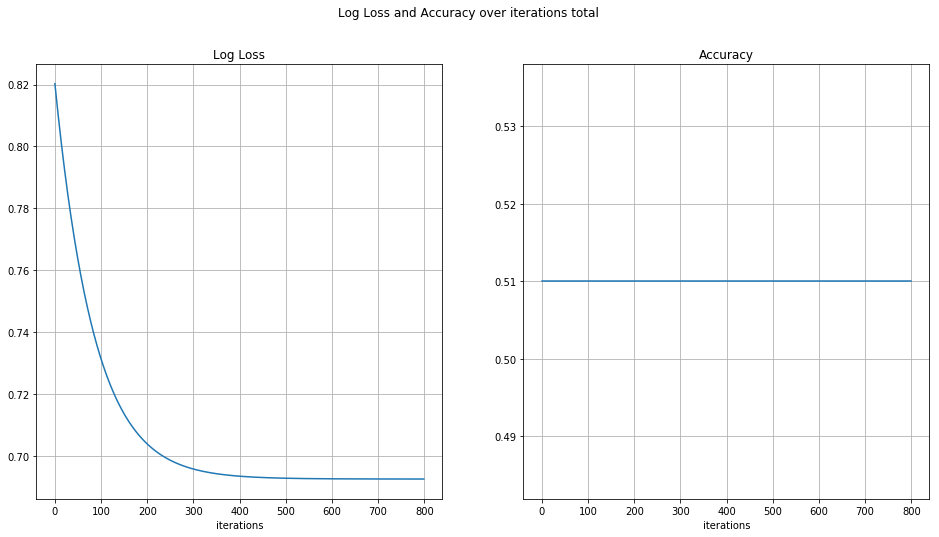

In [18]:
#### Initialize the network parameters
from sklearn.metrics import accuracy_score


np.random.seed(1241)
B = []

def plot_loss_accuracy2(loss_vals, accuracies,k):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    ax.set(xlim=(k-210, k+10))
           
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');
    ax.set(xlim=(k-210, k+10))


W_1 = np.random.uniform(1,2,size = (3,1))
W_2 = np.random.uniform(1,3,size = (1,1))     # we should consider the size of W_2, W_1 as : (num1,num2) , (num2,1)
num_iter = 800
learning_rate = 0.0001    # step size
x_mat = x_mat_full

A = [j for j in range(200, num_iter,200)]


loss_vals , accuracies = [] , []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    
    y_pred, gradient = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]

    ### Compute the loss and accuracy
    loss_val = loss_fn(y, y_pred, eps=1e-16)
    loss_vals.append(loss_val)

    accuracy = accuracy_score(y, y_pred.round())  
    accuracies.append(accuracy)
    
    
    # we need to have y_pred as class (binary) ::> 
    ## Print the loss and accuracy for every 200th iteration
    
    if i in A:
        plot_loss_accuracy2(loss_vals, accuracies,i)
        
plot_loss_accuracy(loss_vals, accuracies)


In [ ]:
#### Plot the predicted answers with mistakes in yellow

In [26]:
B=[]
B.append( (y_pred).round()-y)
B

[array([1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 

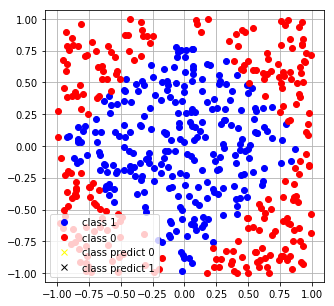

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'bo', label='class 1', color='blue')              # red 0
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'ro', label='class 0', color='red')                  # blue x 
ax.plot(x_mat_full[y_pred==0, 0],x_mat_full[y_pred==0, 1], 'yx', label='class predict 0', color='yellow')     # blue x 
ax.plot(x_mat_full[y_pred==1, 0],x_mat_full[y_pred==1, 1], 'bx', label='class predict 1', color='black') 

ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');


In [30]:
y_pred.round().shape

(500,)

In [31]:
y.shape

(500,)